In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=5

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=5


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import numpy as np
from tqdm.auto import tqdm
import glob
import os
from ganime.visualization.videos import display_videos
from ganime.visualization.images import  display_images

In [ ]:
data = np.load("../../../data/moving_mnist/mnist_test_seq.npy")
data = np.moveaxis(data, 0, 1)
data = tf.stack([data, data, data], axis=-1)
data = tf.reshape(data, (-1, 64, 64, 3))
data.shape

In [7]:
from ganime.data.experimental import ImageDataset

In [9]:
ImageDataset.write_to_tfr(data, out_dir="../../../data/mnist_tfrecords", filename="mnist")

  0%|          | 0/200000 [00:00<?, ?it/s]

Creating 24 files with 8334 elements each.


  0%|          | 0/24 [00:00<?, ?it/s]


Wrote 200000 elements to TFRecord


In [ ]:
data = np.load("../../../data/moving_mnist/mnist_test_seq.npy")
data = np.moveaxis(data, 0, 1)
data = tf.stack([data, data, data], axis=-1)
#data = tf.reshape(data, (-1, 64, 64, 3))
data.shape

In [7]:
from ganime.data.experimental import VideoDataset

In [ ]:
VideoDataset.write_to_tfr(data, out_dir="../../../data/mnist_tfrecords", filename="mnist")

  0%|          | 0/200000 [00:00<?, ?it/s]

In [25]:
import skvideo.io

In [26]:
video = skvideo.io.vread("../../../data/kny/raw_videos/01.mkv")

In [36]:
import cv2
def resize_video(video, new_height=64, new_width=128):
    n_frames = video.shape[0]
    frames = np.zeros((n_frames, new_height, new_width, 3))
    i = 0
    for i in range(n_frames):
        frame = video[i]
        resized = cv2.resize(frame,(new_width, new_height),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
        frames[i] = resized
    return frames

In [40]:
video = resize_video(video)

In [41]:
video = video.astype(np.uint8)

NameError: name 'plt' is not defined

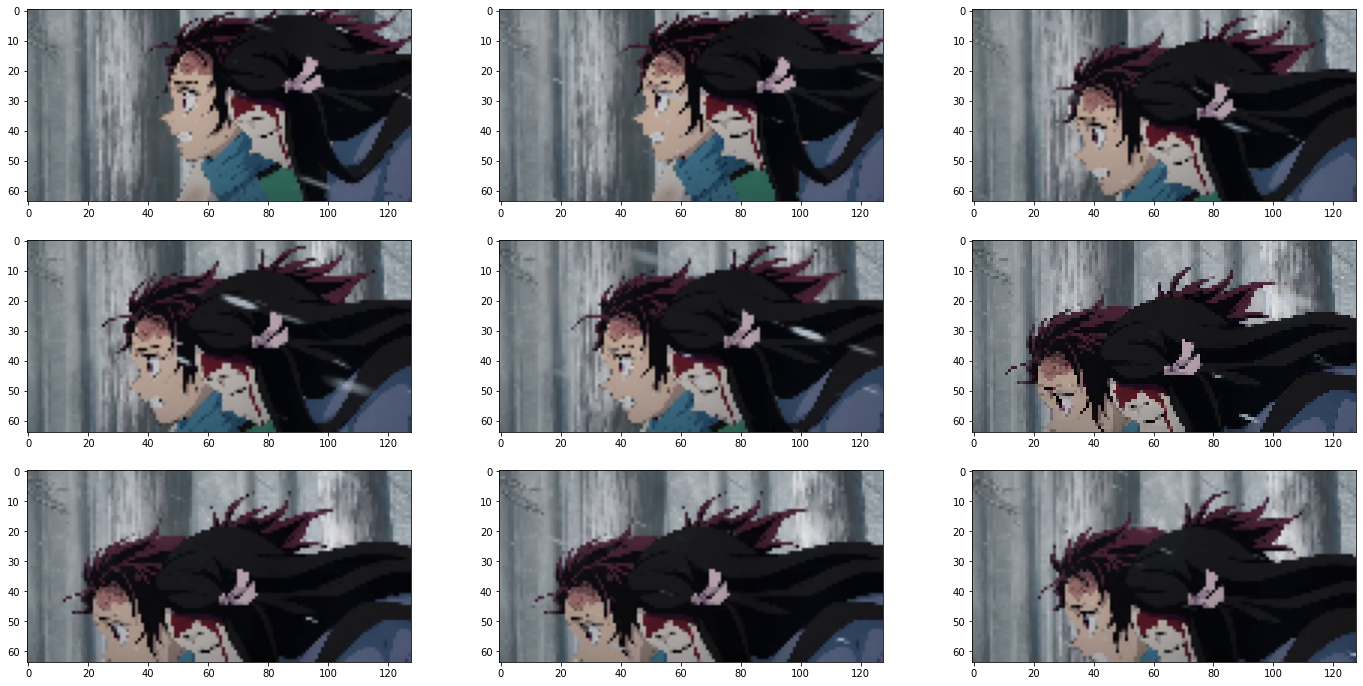

In [45]:
display_images(video[1000:1010])
plt.show()

In [43]:
from ganime.data.experimental import ImageDataset

In [44]:
ImageDataset.write_to_tfr(video, out_dir="../../../data/kny/images_tfrecords_light", filename="kny_images")

  0%|          | 0/34045 [00:00<?, ?it/s]

2022-07-11 05:42:18.305498: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-11 05:42:18.683499: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22297 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:a1:00.0, compute capability: 8.6


Creating 9 files with 3783 elements each.


  0%|          | 0/9 [00:00<?, ?it/s]


Wrote 34045 elements to TFRecord
